In [34]:
library(Matrix)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(viridis))
library(RColorBrewer)
library(data.table)

## Make data frame for plotting
(Parse only)

In [35]:
prop_area = function(obj_parse, tissue) {
    samples = sort(unique(obj_parse$timepoint))
    dflist = list()
    for (i in 1:length(unique(obj_parse$timepoint))){
      tp=obj_parse@meta.data[obj_parse@meta.data$timepoint == samples[i],]
      tp_df=as.data.frame(table(tp$subtypes))
      tp_df$percentage=tp_df$Freq/nrow(tp)
      tp_df$timepoint=rep(i,nrow(tp_df))
      dflist[[i]]=tp_df
    }
    df = do.call(rbind, dflist)
    df <- df[order(df$timepoint),]
    colnames(df)= c("subtypes","Freq","percentage","timepoint")
    saveRDS(df, file=paste0("data/fig1d_",tissue,"_df.rds"))
}

In [19]:
tissue = "adrenal"
prop_area(readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds")), tissue)

tissue = "heart"
prop_area(readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds")), tissue)

tissue = "hippocampus"
prop_area(readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds")), tissue)

tissue = "cortex"
prop_area(readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds")), tissue)

tissue = "gastrocnemius"
prop_area(readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds")), tissue)

# Plot

## Adrenal

In [96]:
tissue = "adrenal"

df = readRDS(paste0("data/fig1d_",tissue,"_df.rds"))

df$subtypes = factor(df$subtypes, levels = c("Adipocyte_cycling","Adipocyte","Capsule","Endothelial_cycling","Endothelial","Fibroblast_cycling",
                                             "Fibroblast","Hepatocyte","Macrophage","Smooth_muscle",
                                            "Skeletal_muscle","Stromal","Sox10","Medulla_early","Medulla_EPI",
                                            "Medulla_NE","Cortex_cycling","Cortex_ZG","Cortex_ZF","Male_only_ZF","X_zone"))


In [97]:
nclusters = length(unique(df$subtypes))
cols = colorRampPalette(brewer.pal(9,"Set1"))(nclusters)


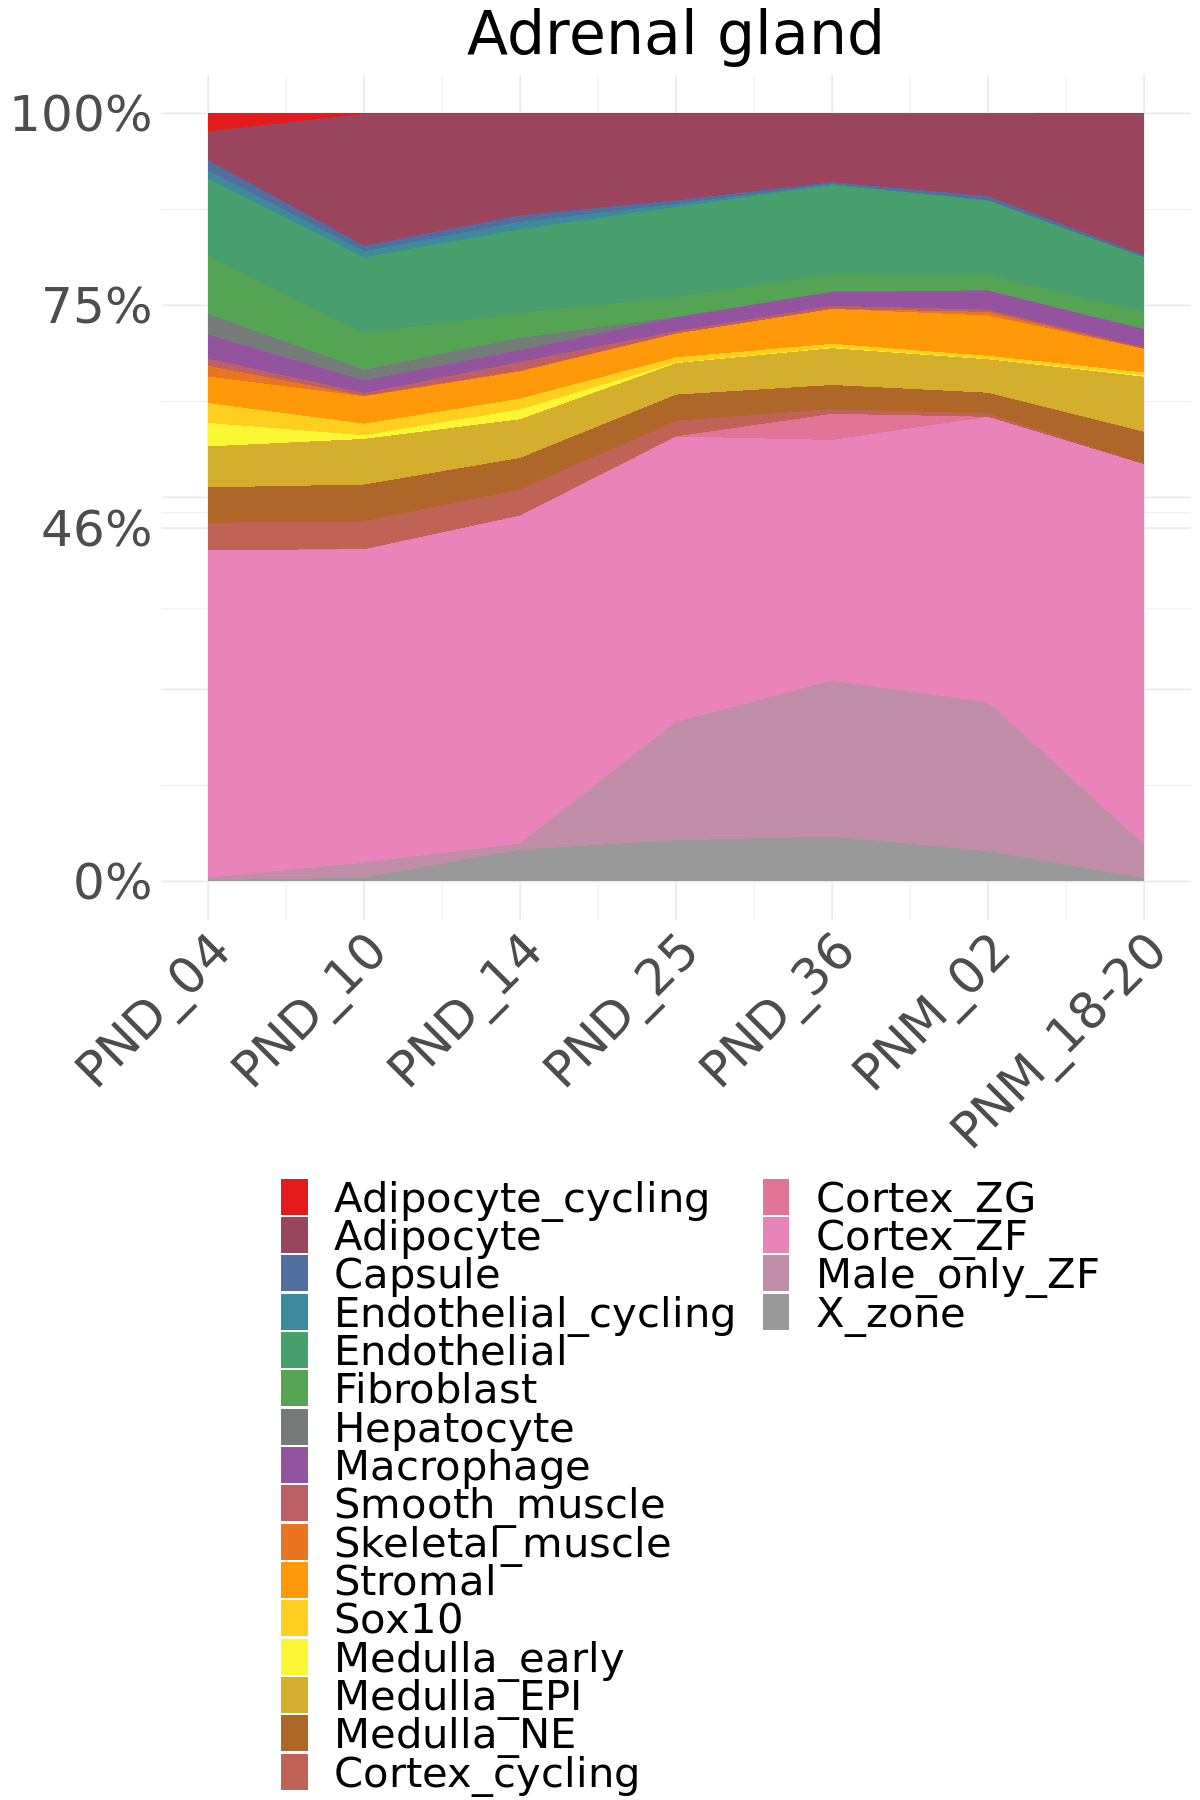

In [101]:
options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + scale_fill_manual(values = cols) +
       labs(title = "Adrenal gland")+
              #subtitle = paste0(n_nuclei," nuclei")) +
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20"))+
    scale_y_continuous(breaks = c(0,0.25,0.46,0.5,0.75,1.0),labels= c("0%","","46%","","75%","100%")) + 
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



## Heart

In [30]:
tissue = "heart"

df = readRDS(paste0("data/fig1d_",tissue,"_df.rds"))


In [31]:
df$subtypes = factor(df$subtypes, levels = c("Adipocyte","Lymphatic_endothelial",
                                             "Endothelial_cycling","Endothelial_juvenile","Endothelial_adult",
                                             "Fibroblast_cycling","Fibroblast_juvenile","Fibroblast_adult",
                                             "Macrophage_cycling","Macrophage","Lymphocyte",
                                             "Smooth_muscle1","Smooth_muscle2","Pericyte_cycling","Pericyte","Schwann",
                                             "Epicardial","Endocardial","Cardiomyocyte_atrial","Cardiomyocyte_cycling",
                                             "Cardiomyocyte_infant","Cardiomyocyte_juvenile","Cardiomyocyte_adult"))




In [32]:
nclusters = length(unique(df$subtypes))
cols = colorRampPalette(brewer.pal(9,"Set1"))(nclusters)


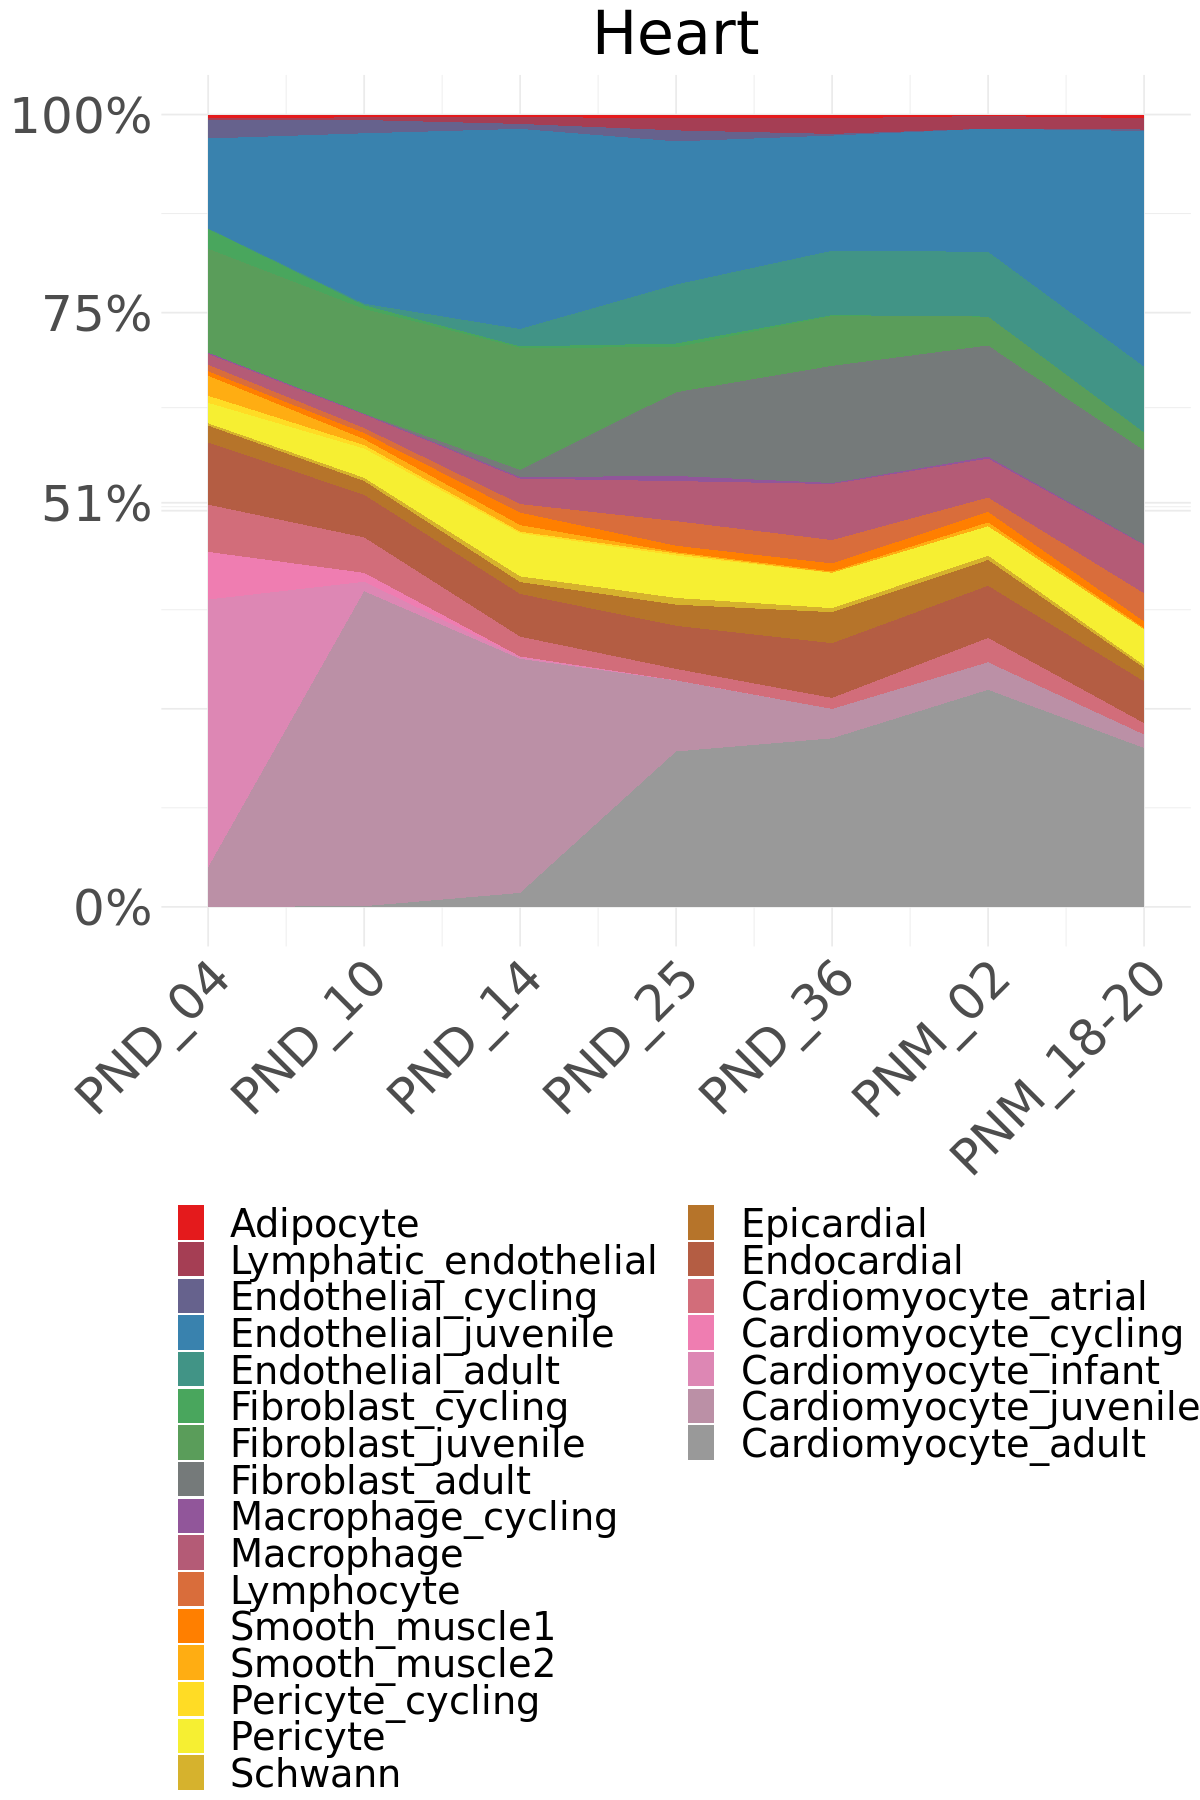

In [33]:
options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + labs(title = "Heart") + scale_fill_manual(values =  (cols)) +
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20"))+
    scale_y_continuous(breaks = c(0,0.25,0.5,0.51,0.75,1.0),labels= c("0%","","","51%","75%","100%")) + 
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=23))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



## Gastrocnemius

In [106]:
tissue = "gastrocnemius"

df = readRDS(paste0("data/fig1d_",tissue,"_df.rds"))


In [107]:
df$subtypes = factor(df$subtypes, levels = c("Adipocyte","FAP","Endothelial",
                                             "Macrophage","Lymphocyte","Smooth_muscle","Schwann","Tenocyte","MTJ","NMJ",
                                             "Satellite","Perinatal","Type1_Myonuclei","Type2X_Myonuclei","Type2A_Myonuclei","Type2B_Myonuclei"))


In [108]:
nclusters = length(unique(df$subtypes))
cols = colorRampPalette(brewer.pal(9,"Set1"))(nclusters)


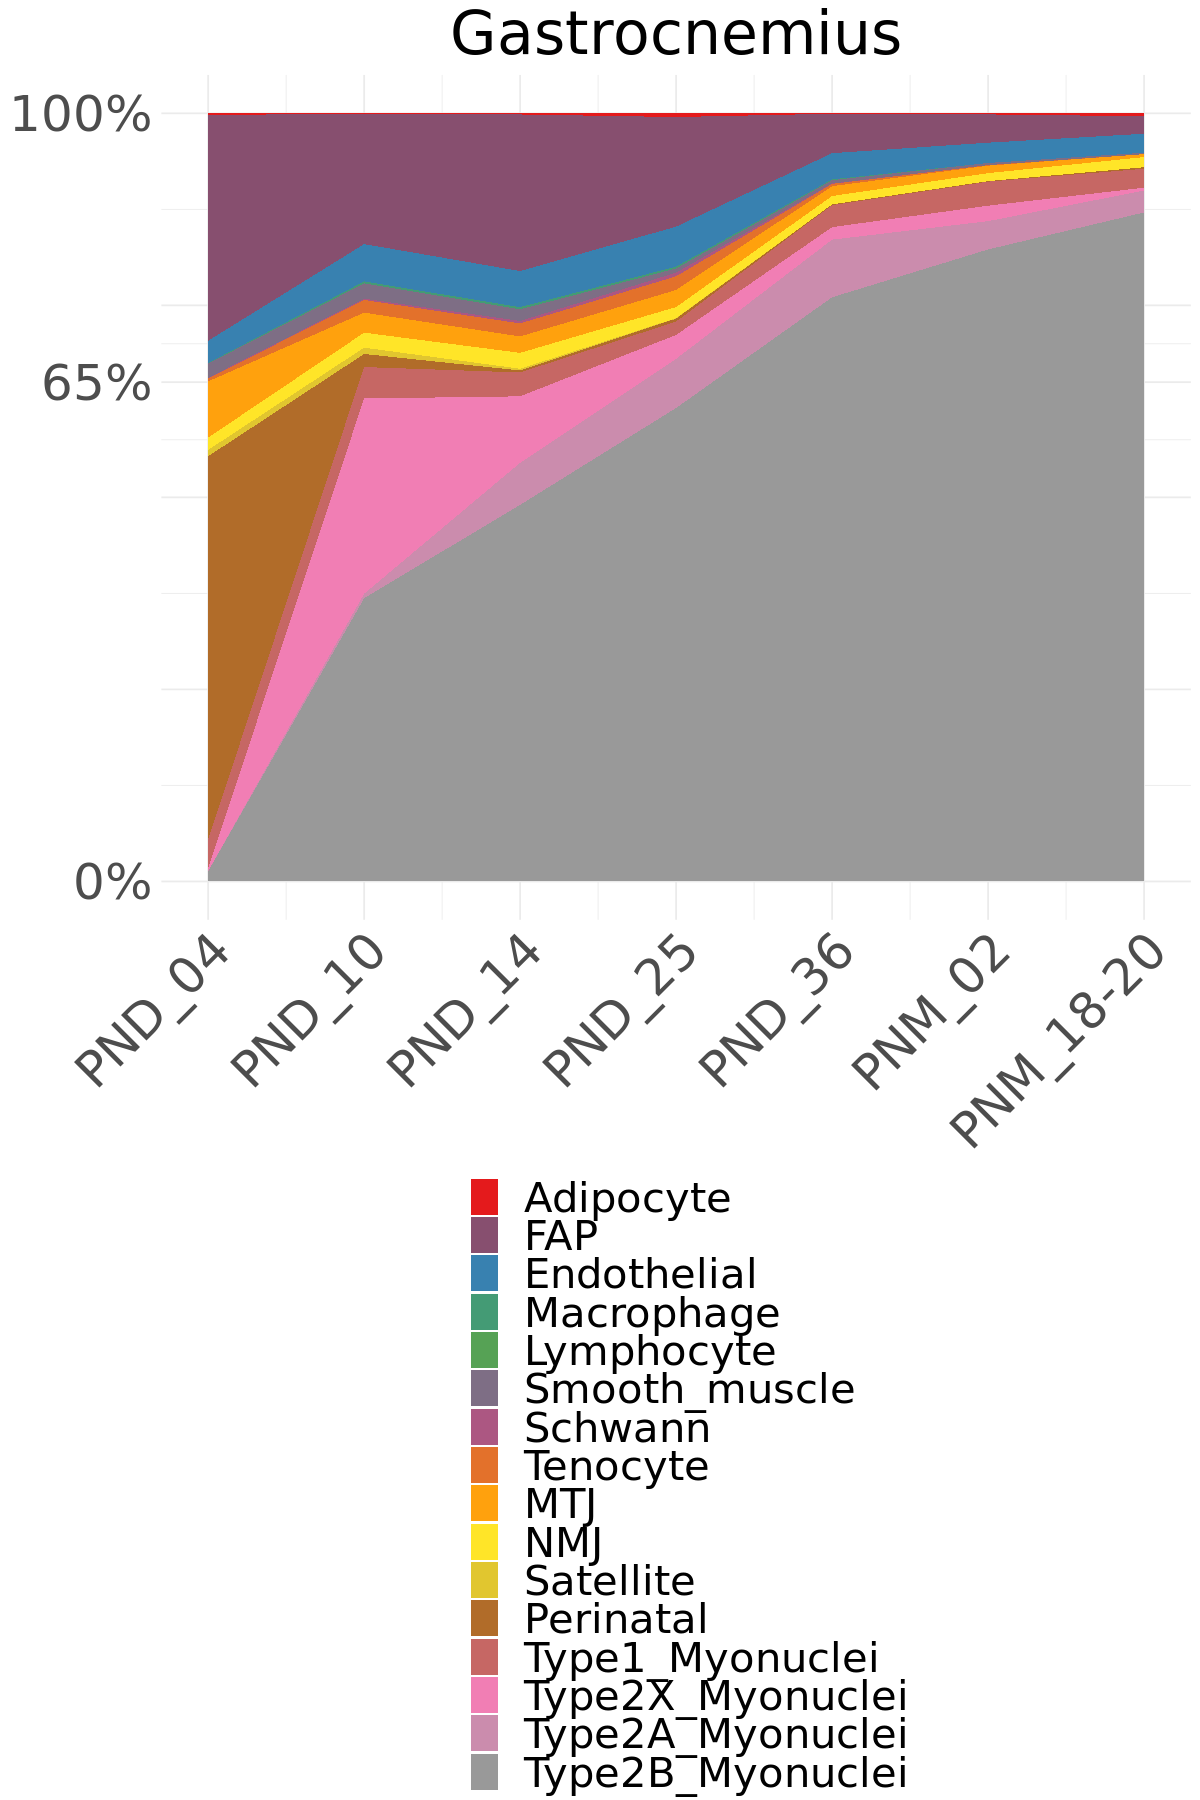

In [110]:
options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + labs(title = "Gastrocnemius") + scale_fill_manual(values =  cols) +
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20"))+
    scale_y_continuous(breaks = c(0,0.25,0.5,0.65,0.75,1.0),labels= c("0%","","","65%","","100%")) + 
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



## Hippocampus

In [26]:
tissue = "hippocampus"

df = readRDS(paste0("data/fig1d_",tissue,"_df.rds"))


In [27]:
df$subtypes = factor(df$subtypes, levels = c("Endothelial","Pericyte",
                                             "VLMC","Ependymal","Microglia","Astrocyte","OPC","MFOL",
                                             "MOL","Meis2","Lamp5","Pvalb",
                                             "Sst","Vip","L2/3","L5/6","Glut_other","SUB_ProS","CR","CA1","CA3",
                                            "DG_early","DG"))


In [28]:
nclusters = length(unique(df$subtypes))
cols = colorRampPalette(brewer.pal(9,"Set1"))(nclusters)


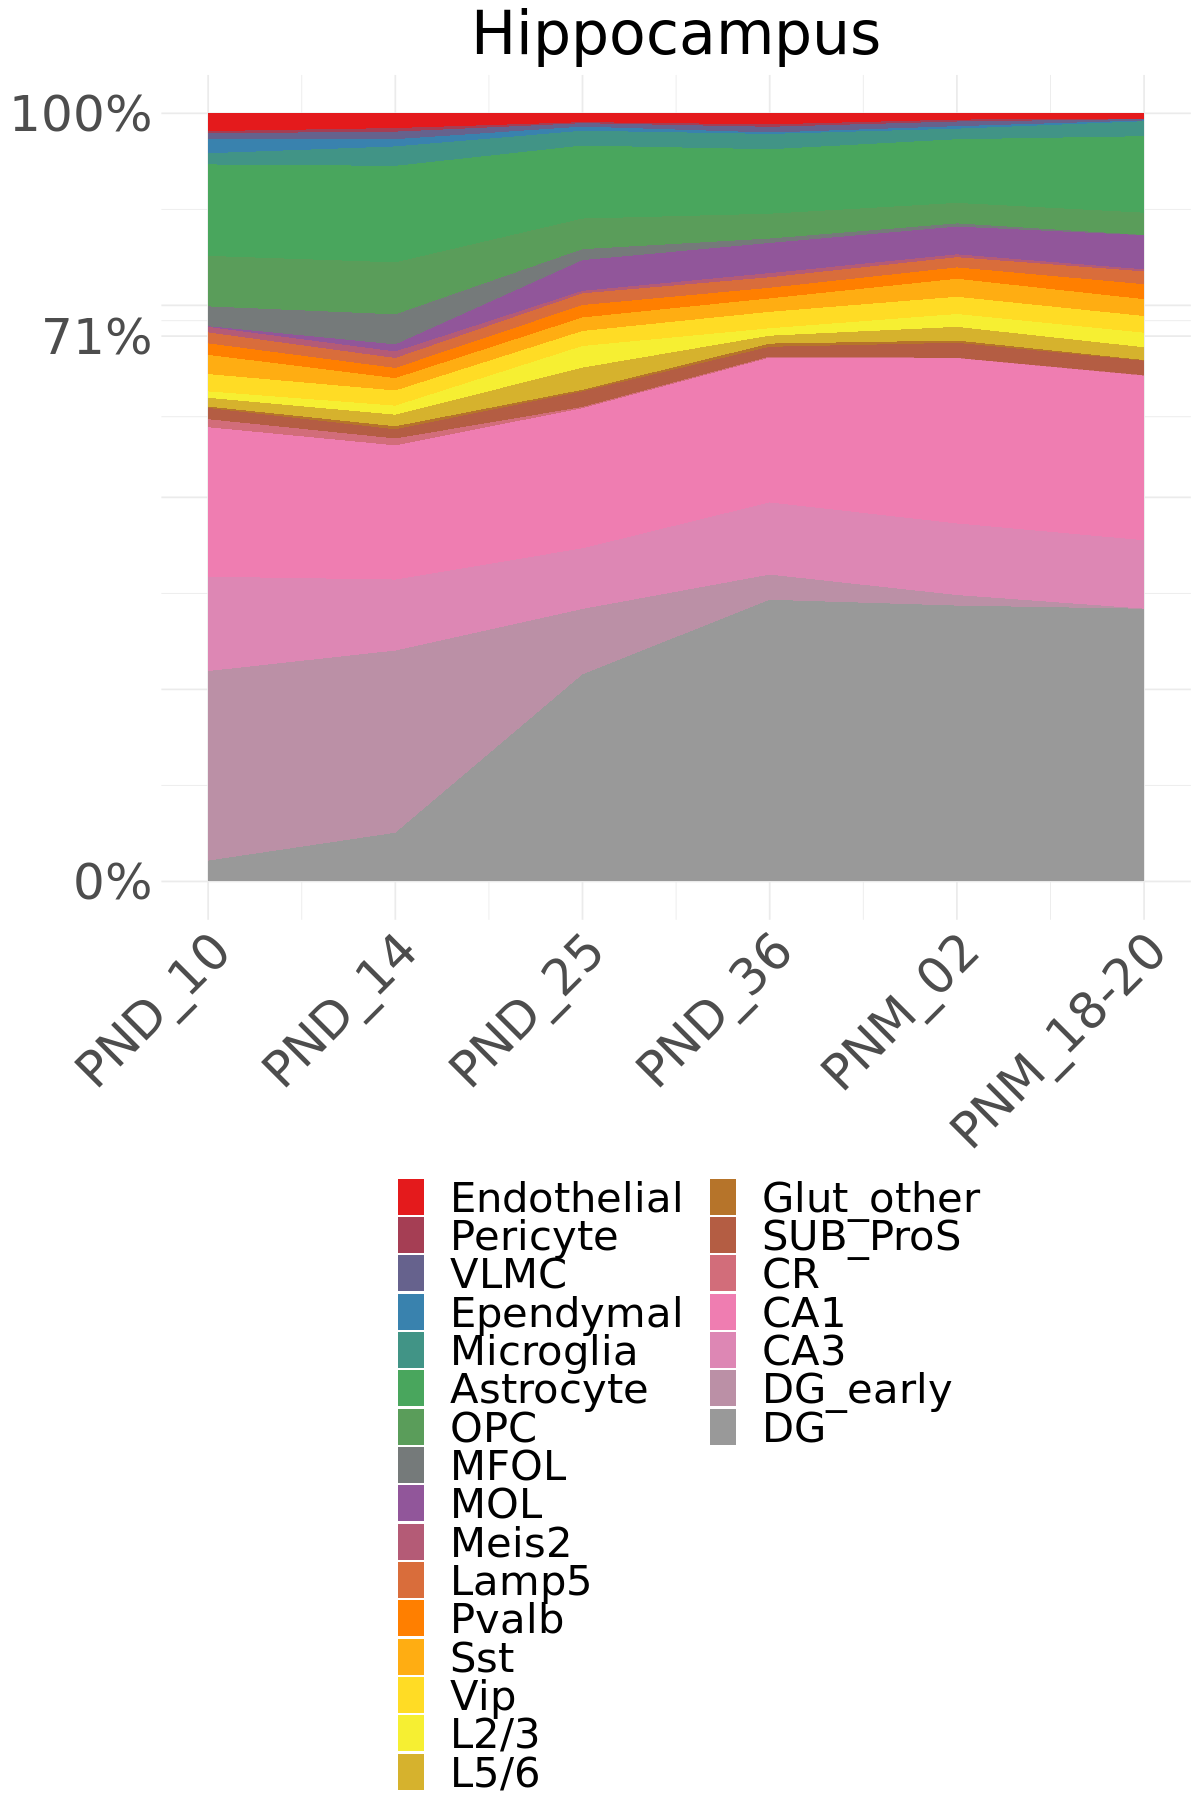

In [29]:
options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + labs(title = "Hippocampus") + scale_fill_manual(values =  (cols)) +
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6),labels= c("PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20"))+
      scale_y_continuous(breaks = c(0,0.25,0.5,0.71,0.75,1.0),labels= c("0%","","","71%","","100%")) + 
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



## Cortex

In [37]:
tissue = "cortex"

df = readRDS(paste0("data/fig1d_",tissue,"_df.rds"))



In [38]:
df$subtypes = factor(df$subtypes, levels = c("Pericyte","Endothelial","VLMC",
          "Microglia", "Astrocyte",
          "OPC","COP","MFOL","MOL",                                
          "GABA_early","Meis2","Lamp5","Vip","Sst","Pvalb",
          "Glut_early","Car3","L2/3_IT","L2/3_IT_PPP","L3_IT_ENT","L4_IT","L5_IT","L5_PT","L6_IT","L6/6b_CT","NP_SUB"))


In [39]:
nclusters = length(unique(df$subtypes))
cols = colorRampPalette(brewer.pal(9,"Set1"))(nclusters)


In [ ]:
options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + labs(title = "Cortex") + scale_fill_manual(values =  cols) +
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20"))+
    scale_y_continuous(breaks = c(0,0.25,0.5,0.65,0.75,0.86,1.0),labels= c("0%","","","","","86%","100%")) + 
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))

